<a href="https://colab.research.google.com/github/Madhav2008/Class122/blob/main/Digit_Recognition_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##cv2 = cv2 is used to open and close our computer cam.
##numpy = numpy is used to perform complex mathematical operations.
##pandas = pandas are used to treat our data as data frames.
##seaborn = seaborn is used to prettify the charts that we have draw with matplotlib.
##matplotlib = plt is used to draw the charts.
##fetch_openml = fetch_openml is used to retrive a dataset by name from openml(public repository for data).
##train_test_split = train_test_split is used to split our data into training and testing.
##LogisticRegression = LogisticRegression is used to create a LogisticRegression model.
##accuracy_score = accuracy_score is used to find the accuracy of the model.

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X, y = fetch_openml("mnist_784", version = 1, return_X_y = True)
print(pd.Series(y).value_counts())

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64


In [ ]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
nclasses = len(classes)

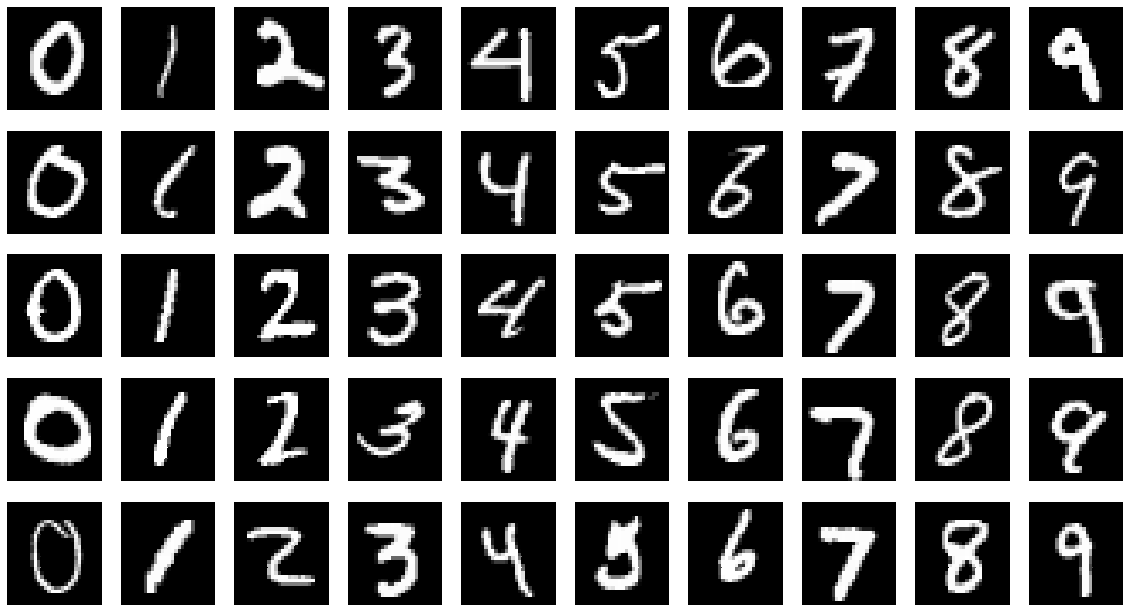

In [ ]:
samplesperclass = 5
fig = plt.figure(figsize = (nclasses * 2, (1 + samplesperclass*2)))
id = 0

for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samplesperclass, replace = False)
  i = 0

  for idx in idxs:
    plt_idx = i * nclasses + id + 1
    p = plt.subplot(samplesperclass, nclasses, plt_idx)
    p = sns.heatmap(np.reshape(X[idx], (28, 28)), cmap = plt.cm.gray, xticklabels = False, yticklabels = False, cbar = False)
    p = plt.axis("off")
    i = i + 1

  id = id + 1

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 9, train_size = 7500, test_size = 2500)
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
clf = LogisticRegression(solver = "saga", multi_class = "multinomial").fit(X_train_scaled, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
Y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy Is : " + str(accuracy))

Accuracy Is : 0.9008


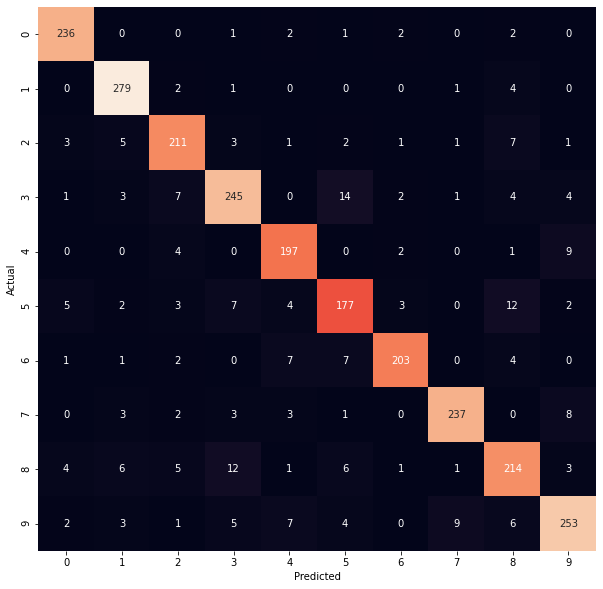

In [ ]:
cm = pd.crosstab(Y_test, Y_pred, rownames = ["Actual"], colnames = ["Predicted"])
p = plt.figure(figsize = (10, 10))
p = sns.heatmap(cm, annot = True, cbar = False, fmt = "d")